# import the libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import re
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# load the dataset

In [3]:
df = pd.read_csv('/content/bestbuy-reviews-2024.csv')
df.head()

,Product Name,Product Link,Review Id,User Name,Rating,Review Title,Review Text,Positive Feedback,Negative Feedback,Review Time,Image URLs
0,Apple Watch SE 2nd Generation (GPS) 40mm Starl...,https://www.bestbuy.com/site/apple-watch-se-2n...,97777611-c331-31de-88b3-12585155a3c6,JoyT,5,Apple Watch,Great price. Love the color. And works just f...,0,0,2024-02-23T16:58:16.000-06:00,https://photos-us.bazaarvoice.com/photo/2/cGhv...
1,Apple Watch SE 2nd Generation (GPS) 40mm Starl...,https://www.bestbuy.com/site/apple-watch-se-2n...,d30770a4-0a8e-32e0-bcb0-af88328326a9,JulioC,5,Super good option,Super good option with less spending than the ...,1,0,2023-12-29T17:31:53.000-06:00,https://photos-us.bazaarvoice.com/photo/2/cGhv...
2,Apple Watch SE 2nd Generation (GPS) 40mm Starl...,https://www.bestbuy.com/site/apple-watch-se-2n...,21a3459e-3460-3b6b-980b-74322aa201d2,Ariwitdamazda,5,Amazing product,I am in love with my Apple Watch it was such a...,0,0,2024-02-11T12:55:45.000-06:00,https://photos-eu.bazaarvoice.com/photo/2/cGhv...
3,Apple Watch SE 2nd Generation (GPS) 40mm Starl...,https://www.bestbuy.com/site/apple-watch-se-2n...,ad91200a-028b-37cc-b9b0-e9d32efec53b,PamelaR,5,Second generation apple watch,In love with my watch perfect size I love the ...,0,0,2024-01-12T15:44:11.000-06:00,https://photos-us.bazaarvoice.com/photo/2/cGhv...
4,Apple Watch SE 2nd Generation (GPS) 40mm Starl...,https://www.bestbuy.com/site/apple-watch-se-2n...,aad28938-820f-3118-8911-01badefae5bd,CarmelaH,5,GET THIS ONE!,I love. love my watch! They have been out for ...,0,0,2024-02-24T11:21:27.000-06:00,https://photos-us.bazaarvoice.com/photo/2/cGhv...


# drop the columns product name, product link, review id and image urls

In [4]:
drop_columns = [0,1,2,10]
df = df.drop(df.columns[drop_columns],axis=1)
df.head()

,User Name,Rating,Review Title,Review Text,Positive Feedback,Negative Feedback,Review Time
0,JoyT,5,Apple Watch,Great price. Love the color. And works just f...,0,0,2024-02-23T16:58:16.000-06:00
1,JulioC,5,Super good option,Super good option with less spending than the ...,1,0,2023-12-29T17:31:53.000-06:00
2,Ariwitdamazda,5,Amazing product,I am in love with my Apple Watch it was such a...,0,0,2024-02-11T12:55:45.000-06:00
3,PamelaR,5,Second generation apple watch,In love with my watch perfect size I love the ...,0,0,2024-01-12T15:44:11.000-06:00
4,CarmelaH,5,GET THIS ONE!,I love. love my watch! They have been out for ...,0,0,2024-02-24T11:21:27.000-06:00


# check for null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User Name          1459 non-null   object
 1   Rating             1484 non-null   int64 
 2   Review Title       1483 non-null   object
 3   Review Text        1484 non-null   object
 4   Positive Feedback  1484 non-null   int64 
 5   Negative Feedback  1484 non-null   int64 
 6   Review Time        1484 non-null   object
dtypes: int64(3), object(4)
memory usage: 81.3+ KB


# check for duplicates

In [6]:
value_counts = df["User Name"].value_counts()
value_counts

User Name
Mike          5
DavidM        4
Chris         4
Justin        3
Steve         3
             ..
JudianysT     1
Savannah      1
HeatherB      1
dominick      1
user142058    1
Name: count, Length: 1400, dtype: int64

In [7]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [User Name, Rating, Review Title, Review Text, Positive Feedback, Negative Feedback, Review Time]
Index: []


# length and wordcount of reviews

In [8]:
# length of the Reviews
df['length'] = df['Review Text'].apply(len)

<Axes: xlabel='word_count', ylabel='Count'>

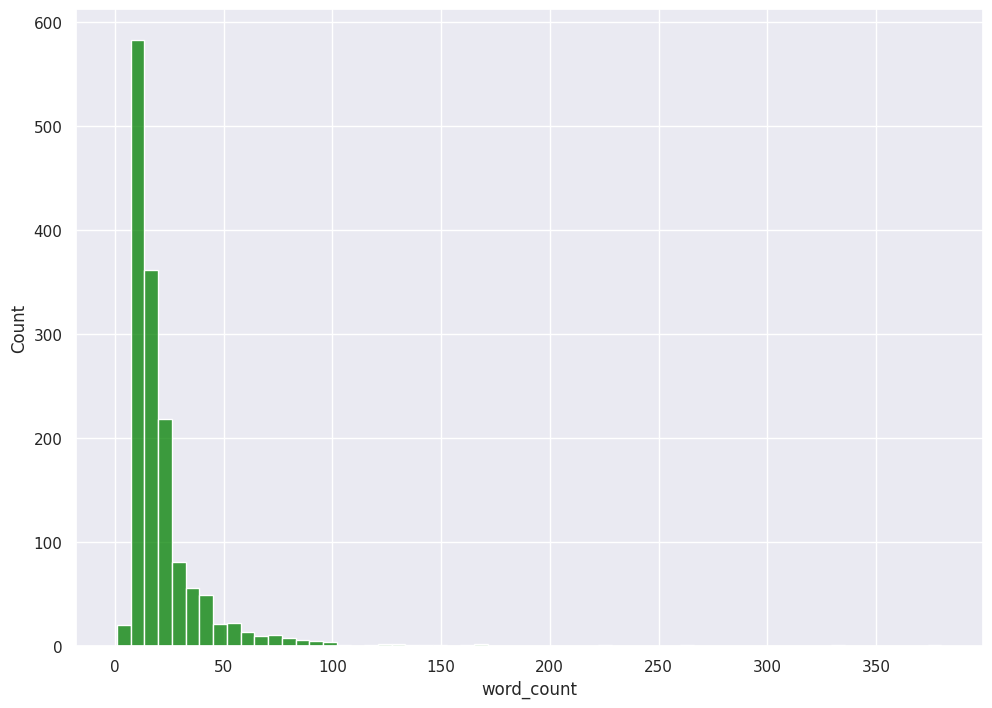

In [9]:
df['word_count'] = df['Review Text'].apply(lambda x:len(str(x).split()))
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=df, x="word_count",bins=60,color='green')

# cleaning the reviews by removing punctuations, special characters and numbers

In [10]:

import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
#remove the punctuations
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

df['Review Text'] = df['Review Text'].apply(punctuation_removal)

In [12]:
stop_words = set(stopwords.words('english'))
df['Review Text'] = df['Review Text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

In [13]:
#remove Numbers from the reviews
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

df['Review Text'] = df['Review Text'].apply(drop_numbers)

In [14]:
df['Review Text'].head(10)

0    Great price Love color works fine monitor acti...
1    Super good option less spending new series alm...
2    love Apple Watch easy process order makes life...
3    love watch perfect size love color super light...
4    love love watch long decided join watch club d...
5    Apple Watch SE nd generation first Apple Watch...
6    Absolutely love Apple Watch Waited long time r...
7    Love Apple Watch it’s perfect size works amazi...
8    nice Christmas gift sister enjoys tracking ten...
9    amazing loved much got gift person loved much ...
Name: Review Text, dtype: object

In [15]:
# remove special characters
def remove_special_characters(text):
    pat = r'[^a-zA-z0-9]'
    return re.sub(pat, ' ', text)

# lets apply this function
df['Review Text'] = df.apply(lambda x: remove_special_characters(x['Review Text']), axis = 1)

In [16]:
import nltk
from nltk.tokenize import word_tokenize
df['Tokenized Text'] = df['Review Text'].apply(word_tokenize)

In [17]:
df['Review Text'].head(10)

0    Great price Love color works fine monitor acti...
1    Super good option less spending new series alm...
2    love Apple Watch easy process order makes life...
3    love watch perfect size love color super light...
4    love love watch long decided join watch club d...
5    Apple Watch SE nd generation first Apple Watch...
6    Absolutely love Apple Watch Waited long time r...
7    Love Apple Watch it s perfect size works amazi...
8    nice Christmas gift sister enjoys tracking ten...
9    amazing loved much got gift person loved much ...
Name: Review Text, dtype: object

In [18]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from nltk.util import ngrams
import nltk
import collections
from sklearn.feature_extraction.text import CountVectorizer

# finding the polarity of reviews

In [19]:
# Polarity of the Reviews
def get_polarity(text):
    textblob = TextBlob(str(text.encode('utf-8')))
    pol = textblob.sentiment.polarity
    return pol

# lets apply the function
df['polarity'] = df['Review Text'].apply(get_polarity)

# subjectivity of the reviews

In [20]:
#  Subjectvity of the Reviews
def get_subjectivity(text):
    textblob = TextBlob(str(text.encode('utf-8')))
    subj = textblob.sentiment.subjectivity
    return subj

# lets apply the Function
df['subjectivity'] = df['Review Text'].apply(get_subjectivity)

In [21]:
#summarize lenght, polarity and subjectivity
df[['length','polarity','subjectivity']].describe()

,length,polarity,subjectivity
count,1484.000000,1484.000000,1484.000000
mean,118.064690,0.450394,0.595390
std,133.790705,0.267865,0.231459
min,50.000000,-0.800000,0.000000
25%,61.000000,0.278471,0.494444
50%,81.000000,0.466667,0.603914
75%,124.000000,0.638125,0.750000
max,2383.000000,1.000000,1.000000


# finding character count, word count and word density

In [22]:
# Character Count in the Reviews
df['char_count'] = df['Review Text'].apply(len)

In [23]:
# calculating the Word Count
df['word_count'] = df['Review Text'].apply(lambda x: len(x.split()))

In [24]:
# Calculating the Word Density
df['word_density'] = df['char_count'] / (df['word_count']+1)

In [25]:
# importing the List of Punctuations
import string
punctuation = string.punctuation

# Calculating the Punctuation Count
df['punctuation_count'] = df['Review Text'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation)))

In [26]:
#summarize charcount, word count, word density and punctuation count
df[['char_count','word_count','word_density','punctuation_count']].describe()

,char_count,word_count,word_density,punctuation_count
count,1484.000000,1484.000000,1484.000000,1484.0
mean,76.623989,11.816712,5.823866,0.0
std,90.779334,12.513301,1.165180,0.0
min,4.000000,1.000000,2.000000,0.0
25%,42.000000,7.000000,5.285714,0.0
50%,54.000000,8.000000,5.750000,0.0
75%,80.000000,13.000000,6.272727,0.0
max,1722.000000,220.000000,26.000000,0.0


# Visualizing Polarity and Subjectivity

<ipython-input-27-21f8909d38f8>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['polarity'])
<ipython-input-27-21f8909d38f8>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['subjectivity'])


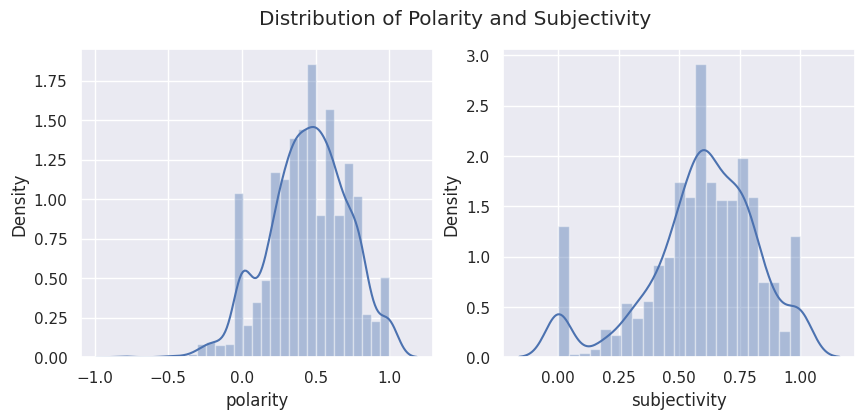

In [27]:
## Visualizing Polarity and Subjectivity

plt.rcParams['figure.figsize'] = (10, 4)

plt.subplot(1, 2, 1)
sns.distplot(df['polarity'])

plt.subplot(1, 2, 2)
sns.distplot(df['subjectivity'])

plt.suptitle('Distribution of Polarity and Subjectivity')
plt.show()

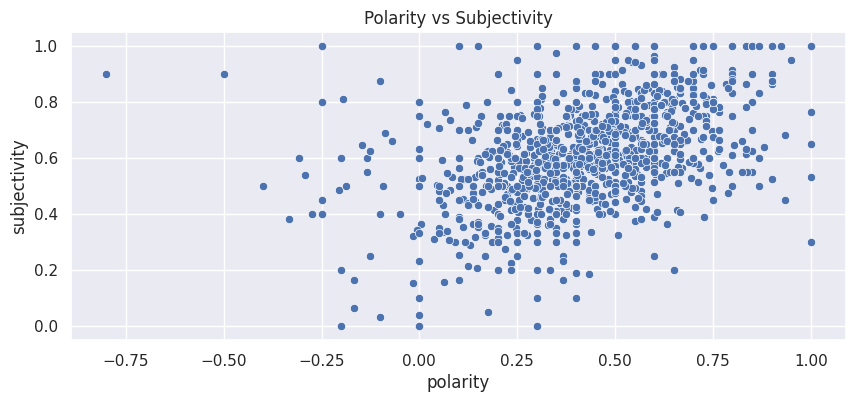

In [28]:
# Scatterplot between Polarity and Subjectivity
sns.scatterplot(x='polarity', y='subjectivity', data=df)
plt.title('Polarity vs Subjectivity')
plt.show()

# Visualizing the Most Frequent Words


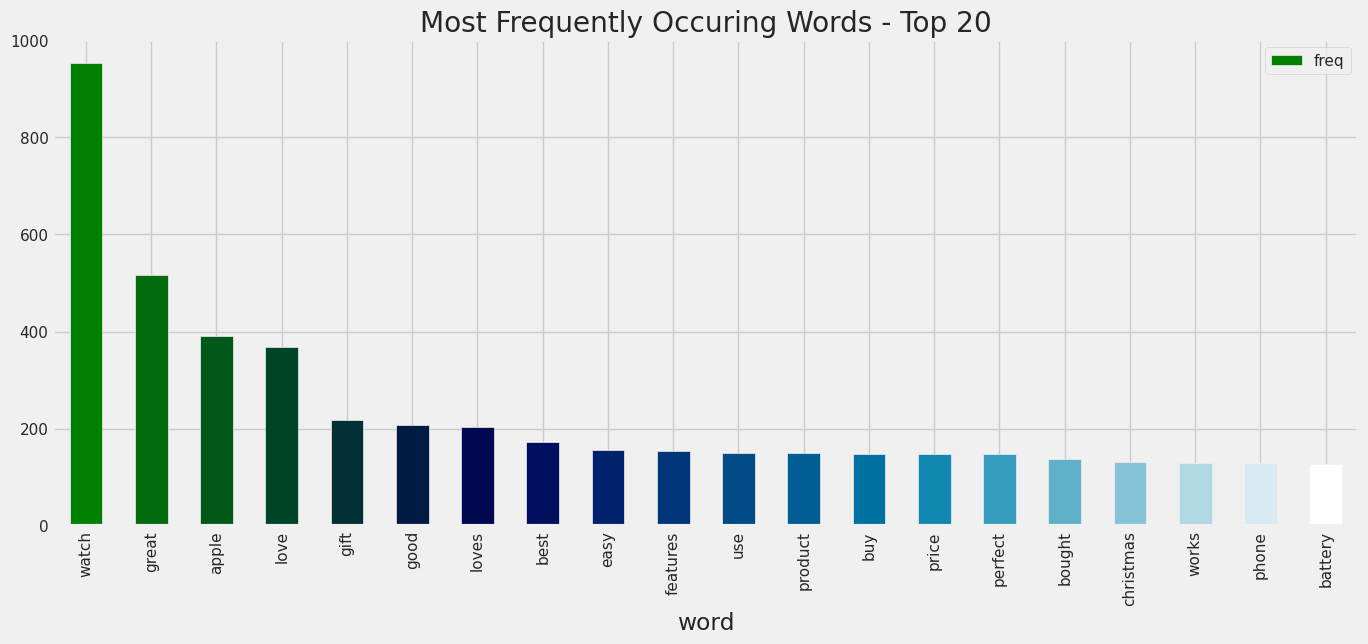

In [29]:
# Visualizing the Most Frequent Words

from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df['Review Text'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words - Top 20")
plt.show()

# Visualizing the Least Frequent Words

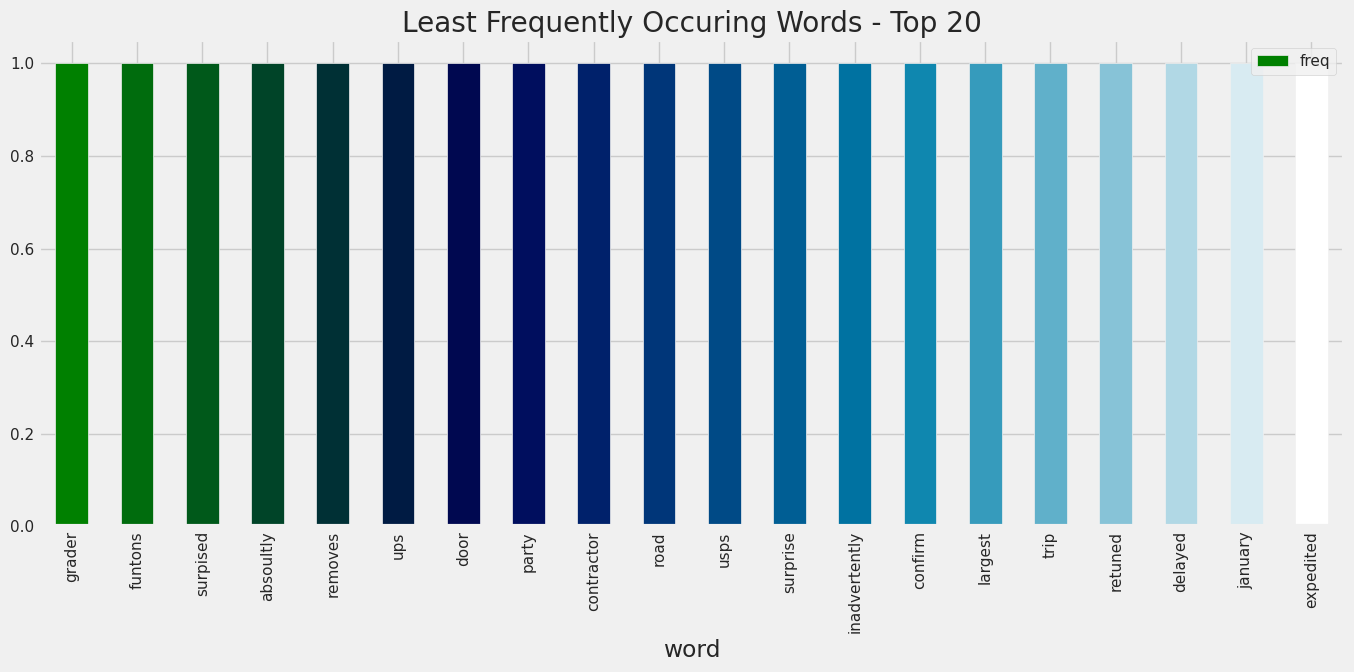

In [30]:
# Visualizing the Least Frequent Words

from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df['Review Text'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.tail(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Least Frequently Occuring Words - Top 20")
plt.show()

# Visualizing the BiGrams

In [31]:
# Visualizing the BiGrams

text = str(df['Review Text'])
tokenized = text.split()

# and get a list of all the bi-grams
esBigrams = ngrams(tokenized, 2)

# get the frequency of each bigram in our corpus
esBigramFreq = collections.Counter(esBigrams)

# what are the ten most popular ngrams in this Spanish corpus?
esBigramFreq.most_common(10)

[(('love', 'watch'), 2),
 (('0', 'Great'), 1),
 (('Great', 'price'), 1),
 (('price', 'Love'), 1),
 (('Love', 'color'), 1),
 (('color', 'works'), 1),
 (('works', 'fine'), 1),
 (('fine', 'monitor'), 1),
 (('monitor', 'acti...'), 1),
 (('acti...', '1'), 1)]

# Visualizing the Trigrams

In [32]:
# Visualizing the Trigrams

text = str(df['Review Text'])
tokenized = text.split()

# and get a list of all the bi-grams
esTrigrams = ngrams(tokenized, 3)

# get the frequency of each bigram in our corpus
esTrigramFreq = collections.Counter(esTrigrams)

# what are the ten most popular ngrams in this Spanish corpus?
esTrigramFreq.most_common(10)

[(('0', 'Great', 'price'), 1),
 (('Great', 'price', 'Love'), 1),
 (('price', 'Love', 'color'), 1),
 (('Love', 'color', 'works'), 1),
 (('color', 'works', 'fine'), 1),
 (('works', 'fine', 'monitor'), 1),
 (('fine', 'monitor', 'acti...'), 1),
 (('monitor', 'acti...', '1'), 1),
 (('acti...', '1', 'Super'), 1),
 (('1', 'Super', 'good'), 1)]

In [33]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<Axes: >

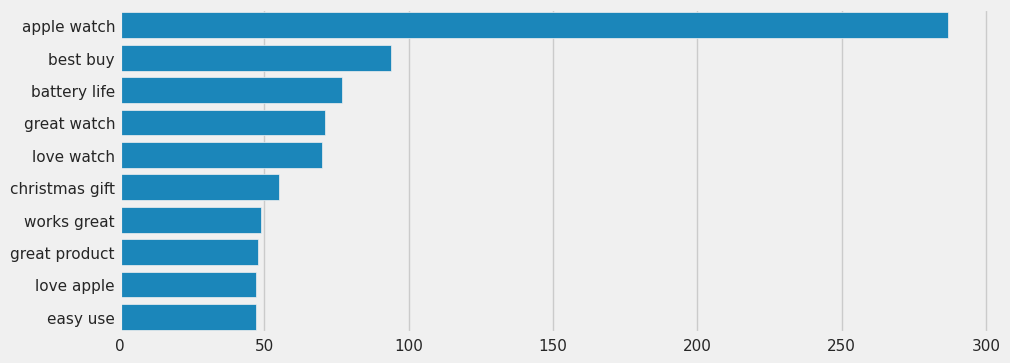

In [34]:
top_bigrams = get_top_ngram(df['Review Text'],2)[:10]
x,y = map(list,zip(*top_bigrams))
sns.barplot(x = y,y = x)

# lets plot the Wordscloud

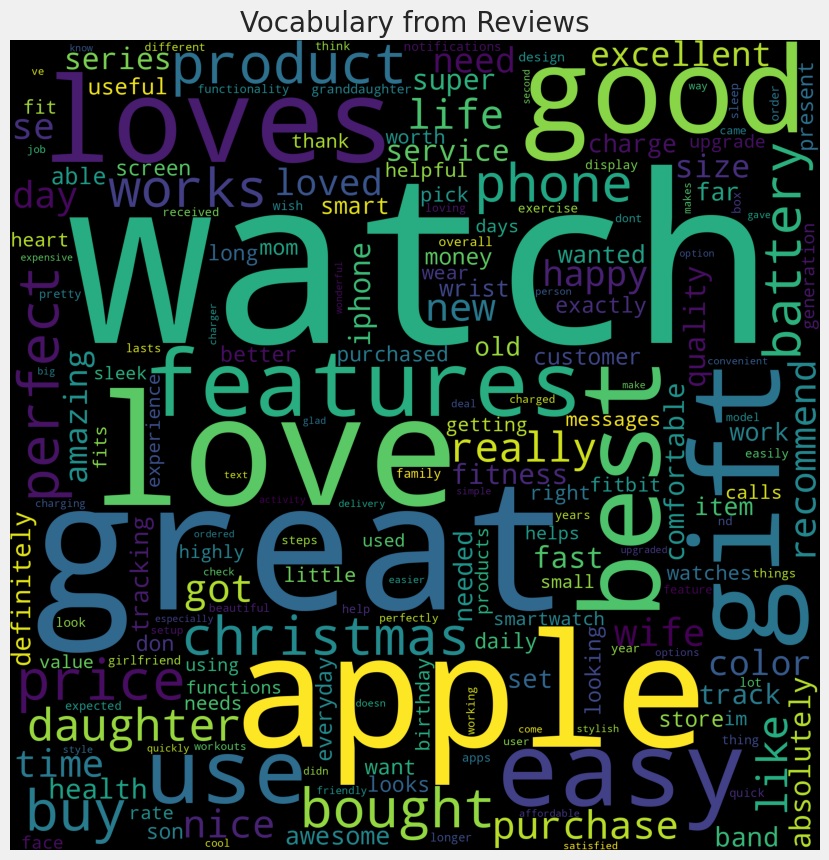

In [35]:
# lets plot the Wordscloud

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df['Review Text'])
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

wordcloud = WordCloud(background_color = 'black', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from Reviews", fontsize = 20)
plt.show()

In [36]:
def get_polarity(text):
    textblob = TextBlob(str(text))
    pol = textblob.sentiment.polarity
    if(pol==0):
        return "Neutral"
    elif(pol>0 and pol<=0.3):
        return "Weakly Positive"
    elif(pol>0.3 and pol<=0.6):
        return "Positive"
    elif(pol>0.6 and pol<=1):
        return "Strongly Positive"
    elif(pol>-1 and pol<=0):
        return "Negative"


df['polarity'] = df['Review Text'].apply(get_polarity)

In [37]:
!pip install textblob

# dividing the polarity into categories

In [38]:
df['polarity'].value_counts()

polarity
Positive             653
Strongly Positive    425
Weakly Positive      275
Neutral               90
Negative              41
Name: count, dtype: int64

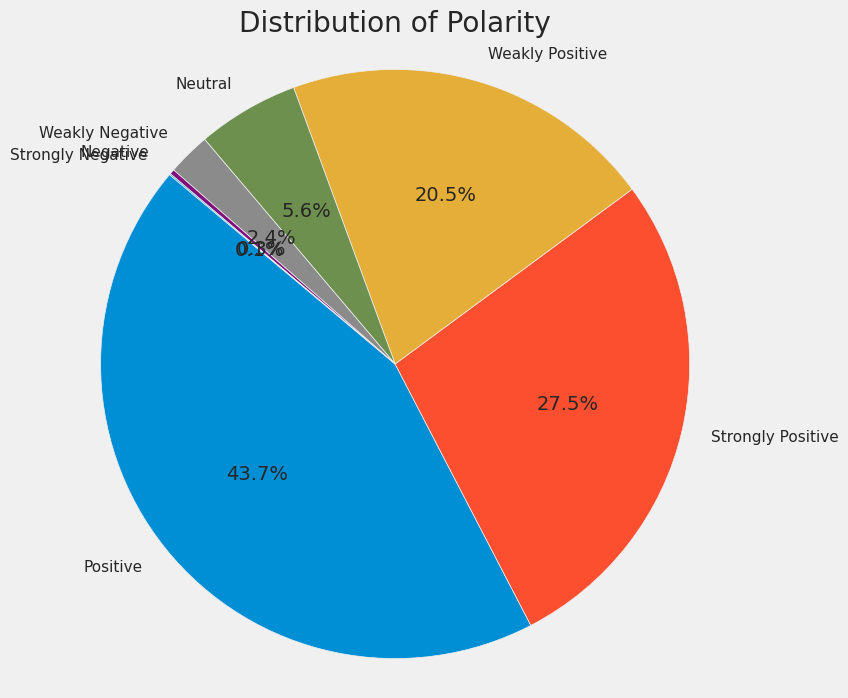

In [39]:
labels = ['Positive', 'Strongly Positive', 'Weakly Positive', 'Neutral', 'Weakly Negative', 'Negative', 'Strongly Negative']
sizes = [649, 408, 304, 83, 35, 4, 1]

# Plot
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Polarity')
plt.show()

In [40]:
df['Review Time'] = df['Review Time'].astype(str)

# Convert 'Review Time' column to string format
df['Review Time'] = df['Review Time'].astype(str)

# Remove the time zone offset and the 'T' character
df['Review Time'] = df['Review Time'].str.replace(r'(-\d{2}:\d{2})', '', regex=True)
df['Review Time'] = df['Review Time'].str.replace('T', ' ')
df['Review Time'] = df['Review Time'].str.replace(r'\.000', '', regex=True)

# Convert 'Review Time' column to datetime format
df['Review Time'] = pd.to_datetime(df['Review Time'], format='%Y-%m-%d %H:%M:%S')
df['Review Time']

0      2024-02-23 16:58:16
1      2023-12-29 17:31:53
2      2024-02-11 12:55:45
3      2024-01-12 15:44:11
4      2024-02-24 11:21:27
               ...        
1479   2024-01-27 20:57:23
1480   2023-12-22 16:32:33
1481   2024-01-12 15:44:06
1482   2023-12-22 20:32:02
1483   2023-12-22 16:34:36
Name: Review Time, Length: 1484, dtype: datetime64[ns]

In [41]:
df['Day'] = df['Review Time'].dt.day
df['Month'] = df['Review Time'].dt.month
def categorize_weekday(day):
    if day < 5:
        return 'Weekday'
    else:
        return 'Weekend'

# Apply the function to categorize weekdays
df['Day Category'] = df['Review Time'].dt.dayofweek.apply(categorize_weekday)
df.head()

,User Name,Rating,Review Title,Review Text,Positive Feedback,Negative Feedback,Review Time,length,word_count,Tokenized Text,polarity,subjectivity,char_count,word_density,punctuation_count,Day,Month,Day Category
0,JoyT,5,Apple Watch,Great price Love color works fine monitor acti...,0,0,2024-02-23 16:58:16,146,14,"[Great, price, Love, color, works, fine, monit...",Positive,0.512500,82,5.466667,0,23,2,Weekday
1,JulioC,5,Super good option,Super good option less spending new series alm...,1,0,2023-12-29 17:31:53,150,17,"[Super, good, option, less, spending, new, ser...",Weakly Positive,0.435985,96,5.333333,0,29,12,Weekday
2,Ariwitdamazda,5,Amazing product,love Apple Watch easy process order makes life...,0,0,2024-02-11 12:55:45,330,34,"[love, Apple, Watch, easy, process, order, mak...",Weakly Positive,0.618452,196,5.600000,0,11,2,Weekend
3,PamelaR,5,Second generation apple watch,love watch perfect size love color super light...,0,0,2024-01-12 15:44:11,74,9,"[love, watch, perfect, size, love, color, supe...",Positive,0.694444,51,5.100000,0,12,1,Weekday
4,CarmelaH,5,GET THIS ONE!,love love watch long decided join watch club d...,0,0,2024-02-24 11:21:27,239,22,"[love, love, watch, long, decided, join, watch...",Positive,0.608333,122,5.304348,0,24,2,Weekend


In [42]:
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 20:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to categorize time of day
df['Time of Day'] = df['Review Time'].dt.hour.apply(categorize_time_of_day)

df.head()

,User Name,Rating,Review Title,Review Text,Positive Feedback,Negative Feedback,Review Time,length,word_count,Tokenized Text,polarity,subjectivity,char_count,word_density,punctuation_count,Day,Month,Day Category,Time of Day
0,JoyT,5,Apple Watch,Great price Love color works fine monitor acti...,0,0,2024-02-23 16:58:16,146,14,"[Great, price, Love, color, works, fine, monit...",Positive,0.512500,82,5.466667,0,23,2,Weekday,Afternoon
1,JulioC,5,Super good option,Super good option less spending new series alm...,1,0,2023-12-29 17:31:53,150,17,"[Super, good, option, less, spending, new, ser...",Weakly Positive,0.435985,96,5.333333,0,29,12,Weekday,Evening
2,Ariwitdamazda,5,Amazing product,love Apple Watch easy process order makes life...,0,0,2024-02-11 12:55:45,330,34,"[love, Apple, Watch, easy, process, order, mak...",Weakly Positive,0.618452,196,5.600000,0,11,2,Weekend,Afternoon
3,PamelaR,5,Second generation apple watch,love watch perfect size love color super light...,0,0,2024-01-12 15:44:11,74,9,"[love, watch, perfect, size, love, color, supe...",Positive,0.694444,51,5.100000,0,12,1,Weekday,Afternoon
4,CarmelaH,5,GET THIS ONE!,love love watch long decided join watch club d...,0,0,2024-02-24 11:21:27,239,22,"[love, love, watch, long, decided, join, watch...",Positive,0.608333,122,5.304348,0,24,2,Weekend,Morning


# import the libraries for model

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler

# model training

In [44]:
def check_imbalance(y):
    imbalance_ratio = sum(y == 1) / sum(y == 0)
    if imbalance_ratio < 0.2 or imbalance_ratio > 5:
        return True
    return False

In [45]:
def balance_data(X, y):
    oversampler = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = oversampler.fit_resample(X, y)
    return X_resampled, y_resampled


In [46]:
def check_imbalance(y):
    if sum(y == 0) == 0:
        return False  # Data is imbalanced if there are no zeros
    imbalance_ratio = sum(y == 1) / sum(y == 0)
    if imbalance_ratio < 0.2 or imbalance_ratio > 5:
        return True
    return False

In [47]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

In [49]:
features = ['Rating', 'subjectivity', 'Day', 'Month', 'Day Category', 'Time of Day']
target = 'polarity'

# Separate features and target
X = df[features]
y = df[target]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', 'passthrough', ['Rating', 'subjectivity']),
        ('day', OneHotEncoder(drop='first', handle_unknown='ignore'), ['Day']),
        ('month', OneHotEncoder(drop='first', handle_unknown='ignore'), ['Month']),
        ('day_category', OneHotEncoder(drop='first', handle_unknown='ignore'), ['Day Category']),
        ('time_of_day', OneHotEncoder(drop='first', handle_unknown='ignore'), ['Time of Day']),
    ],
    remainder='passthrough',
)

In [52]:
logistic_regression = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [53]:
random_forest = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [54]:
decision_tree = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

In [55]:
print(isinstance(logistic_regression, Pipeline))
print(isinstance(random_forest, Pipeline))
print(isinstance(decision_tree, Pipeline))


True
True
True


In [56]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

In [57]:
logistic_regression.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric', 'passthrough',
                                                  ['Rating', 'subjectivity']),
                                                 ('day',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Day']),
                                                 ('month',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Month']),
                                                 ('day_category',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Day Category']),
                                                 ('time_of_day',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Time of Day'])])),
                ('classifier', DecisionTreeClassifier())])

In [58]:
def evaluate_model(model, X_test, y_test):
    if model is None:
        return None, None, None, None
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

In [59]:
lr_accuracy, lr_precision, lr_recall, lr_f1 = evaluate_model(logistic_regression, X_test, y_test)
rf_accuracy, rf_precision, rf_recall, rf_f1 = evaluate_model(random_forest, X_test, y_test)
dt_accuracy, dt_precision, dt_recall, dt_f1 = evaluate_model(decision_tree, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [60]:
print("Logistic Regression:")
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1-score:", lr_f1)
print("\n")

print("Random Forest:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)
print("\n")

print("Decision Tree:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1-score:", dt_f1)

Logistic Regression:
Accuracy: 0.5791245791245792
Precision: 0.6106289815210003
Recall: 0.5791245791245792
F1-score: 0.5394202534278658


Random Forest:
Accuracy: 0.5286195286195287
Precision: 0.5115314139123663
Recall: 0.5286195286195287
F1-score: 0.5179066325423258


Decision Tree:
Accuracy: 0.5016835016835017
Precision: 0.5001579287614565
Recall: 0.5016835016835017
F1-score: 0.4991996305730665


# **create prototype**

In [62]:
import pickle

In [64]:
filename = 'model.sav'
pickle.dump(logistic_regression,open(filename,'wb'))

In [67]:
model = pickle.load(open('model.sav','rb'))

In [89]:

# Load the model
filename = 'model.sav'
model = pickle.load(open(filename, 'rb'))

# Prepare the input data as a DataFrame
input = [5, 0.125, 23, 2, 'Weekday', 'Afternoon']
input_df = pd.DataFrame([input], columns=['Rating', 'subjectivity', 'Day', 'Month', 'Day Category', 'Time of Day'])

# Make a prediction
prediction = model.predict(input_df)

# Print the prediction
print(prediction)


['Positive']
